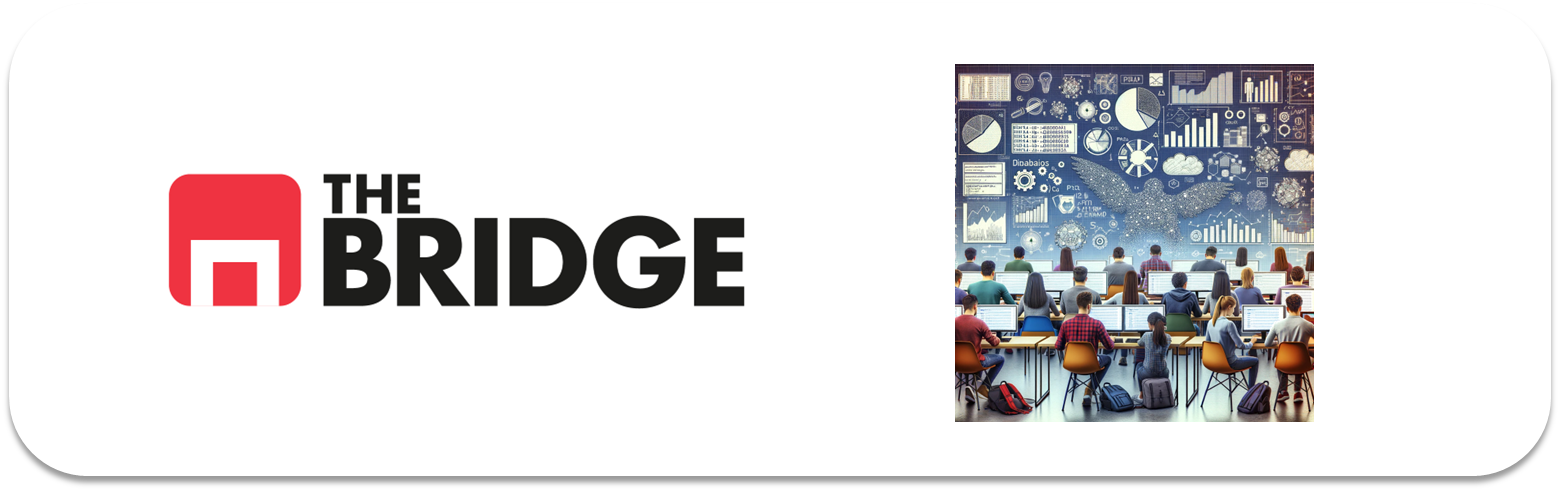

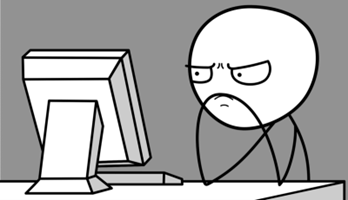

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [8]:
df = pd.read_csv("./data/CarPrice_Assignment.csv")
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [11]:
df_coches = df.copy()

In [13]:
df_coches.rename(columns={'price':'target'}, inplace=True)

In [15]:
df_coches.drop(columns="car_ID", inplace=True)

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
df_coches.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'target'],
      dtype='object')

In [19]:
X = df_coches[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df_coches['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 24)
(41, 24)
(164,)
(41,)


### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

In [39]:
train_set, test_set = train_test_split(df_coches, test_size=0.2, random_state=42)

In [40]:
train_set.shape

(164, 25)

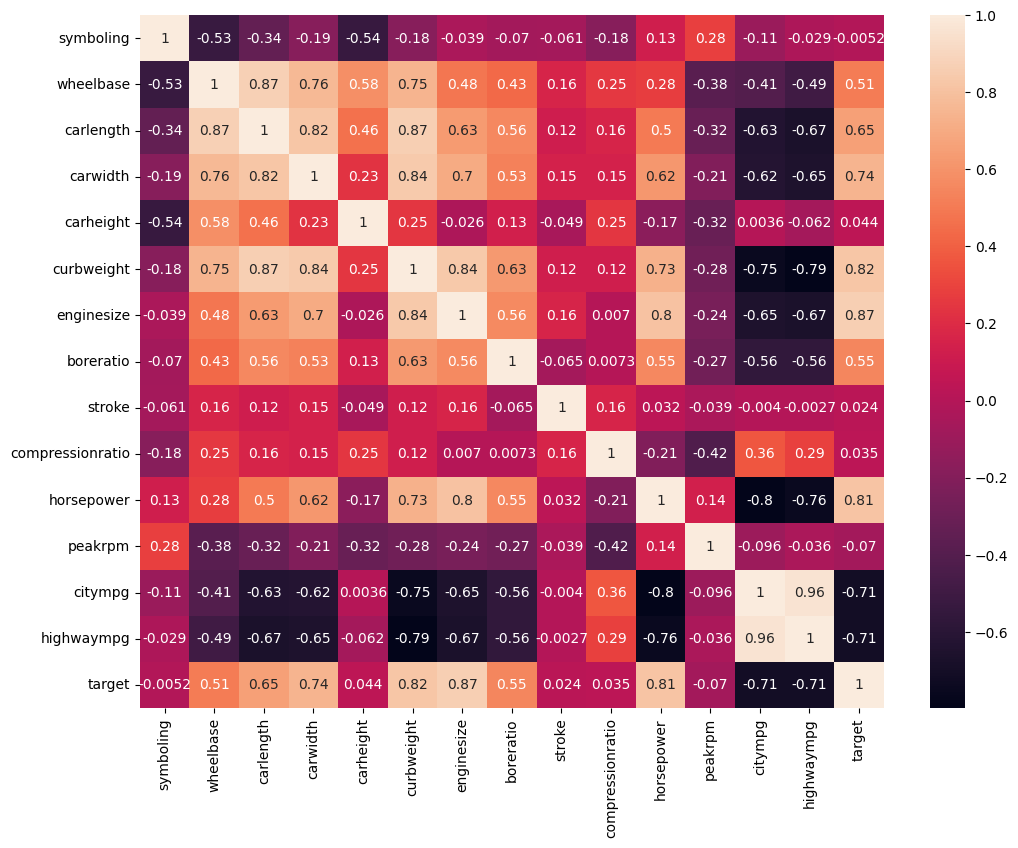

In [41]:
plt.figure(figsize=(12,9))
sns.heatmap(train_set.corr(numeric_only = True), annot=True);

In [38]:
features_num = ['curbweight', 'enginesize', 'citympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [46]:
# Separación x e y
X_train = train_set.drop(columns= ['target'])
y_train = train_set['target']

X_test = test_set.drop(columns = ['target'])
y_test = test_set['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [47]:
from sklearn import metrics

In [58]:
X_train

,curbweight,enginesize,citympg
0,0.281287,0.188010,0.964316
1,1.016045,-0.158993,-0.988126
2,-0.541642,-0.852999,0.964316
3,-1.147082,-0.729070,0.964316
4,-0.524008,-0.406852,0.313502
...,...,...,...
159,1.141443,1.352950,-0.988126
160,0.976857,0.931589,-0.825423
161,-1.211741,-0.729070,0.964316
162,0.900443,1.105090,-0.988126


In [65]:
#train
pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train, y_train))

MAE train 2504.5876799833454
RMSE train 3477.0166305286934
R2 train 0.7972823097067891


In [66]:
# Test
pred_test = lin_reg.predict(X_test)
print('MAE test', metrics.mean_absolute_error(y_test, pred_test))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 test', lin_reg.score(X_test, y_test))

MAE test 2777.7345408111782
RMSE test 3983.5988981731252
R2 test 0.7989833808222545


In [64]:
# para que si, por ejemplo el R2, están cercanos a 1 y son iguales, eso es bueno y el RMSE no es muy elevado pensando que son precios de coches

### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

In [74]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ridgeR.predict(X_train))))
print('Train R2:', ridgeR.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, ridgeR.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))
print('Test R2:', ridgeR.score(X_test, y_test))

Train MAE sin regularizacion: 12089644.648973107
Train RMSE sin regularizacion: 3477.0166305286934
Train R2 sin regularizacion: 0.7972823097067891
Test MAE sin regularizacion: 2777.7345408111782
Test RMSE sin regularizacion: 3983.5988981731252
Test R2 sin regularizacion: 0.7989833808222545


Train MAE: 12172681.570949651
Train RMSE: 3488.93702593636
Train R2: 0.7958899567037939
Test MAE: 2819.7526308903225
Test RMSE: 4025.432969436051
Test R2: 0.794739229002228


* Comparando todos, da valores casi identicos comparandolos entre si, el RMSE y R2 no han mejorado

### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

In [70]:
# hecho arriba

### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

In [75]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha=125)
lassoR.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lassoR.predict(X_train))))
print('Train R2:', lassoR.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, lassoR.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lassoR.predict(X_test))))
print('Test R2:', lassoR.score(X_test, y_test))

Train MAE sin regularizacion: 12089644.648973107
Train RMSE sin regularizacion: 3477.0166305286934
Train R2 sin regularizacion: 0.7972823097067891
Test MAE sin regularizacion: 2777.7345408111782
Test RMSE sin regularizacion: 3983.5988981731252
Test R2 sin regularizacion: 0.7989833808222545


Train MAE: 12108620.663818266
Train RMSE: 3479.74433885857
Train R2: 0.796964122199044
Test MAE: 2762.0458600637894
Test RMSE: 3970.41760448897
Test R2: 0.8003114640174345


* Tenemos mejores numeros que con el Ridge comparandolos

### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

In [76]:
# Arriba

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

In [77]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.2, l1_ratio = 0.7)
elastic_net.fit(X_train, y_train)

print('Train MAE sin regularizacion:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('Train RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('Train R2 sin regularizacion:', lin_reg.score(X_train, y_train))
print('Test MAE sin regularizacion:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('Test RMSE sin regularizacion:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))
print('Test R2 sin regularizacion:', lin_reg.score(X_test, y_test))
print('\n')
print('Train MAE:', metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, elastic_net.predict(X_train))))
print('Train R2:', elastic_net.score(X_train, y_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))
print('Test R2:', elastic_net.score(X_test, y_test))

Train MAE sin regularizacion: 12089644.648973107
Train RMSE sin regularizacion: 3477.0166305286934
Train R2 sin regularizacion: 0.7972823097067891
Test MAE sin regularizacion: 2777.7345408111782
Test RMSE sin regularizacion: 3983.5988981731252
Test R2 sin regularizacion: 0.7989833808222545


Train MAE: 12170385.437141782
Train RMSE: 3488.6079511951157
Train R2: 0.7959284579960693
Test MAE: 2818.9034399916213
Test RMSE: 4024.545642455202
Test R2: 0.7948297103729258


* Nos da peores resultado que con Ridge y Lasso

### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

* Encontrar un alpha adecuado o mas óptimo

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [78]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
curbweight,1633.511804
enginesize,4435.202208
citympg,-1360.840296


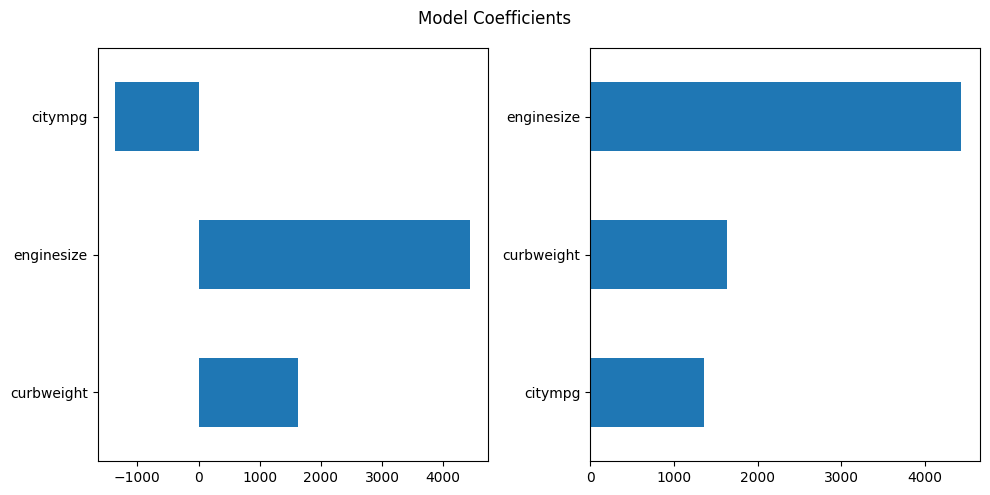

In [81]:
show_coefs(lin_reg)

,coefs
curbweight,1896.099525
enginesize,3953.228529
citympg,-1393.600142


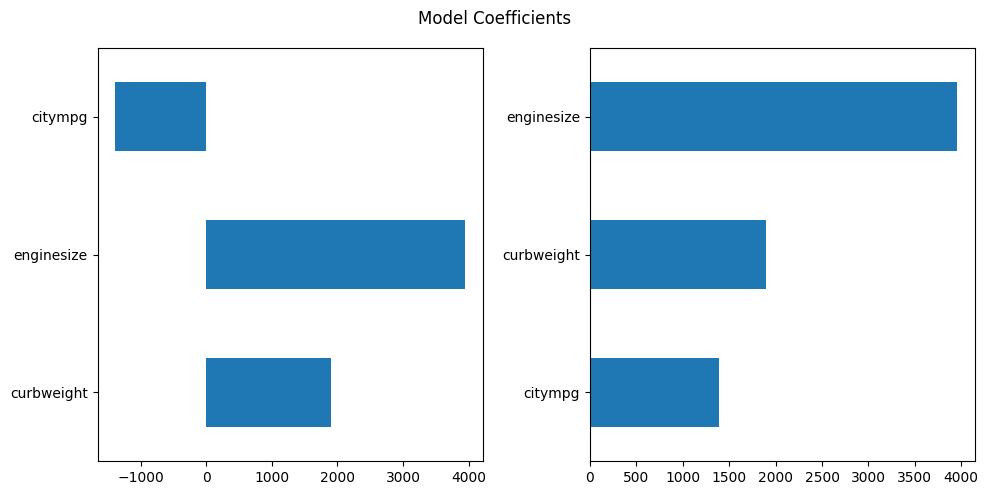

In [82]:
show_coefs(ridgeR)

,coefs
curbweight,1612.175392
enginesize,4372.650799
citympg,-1292.831689


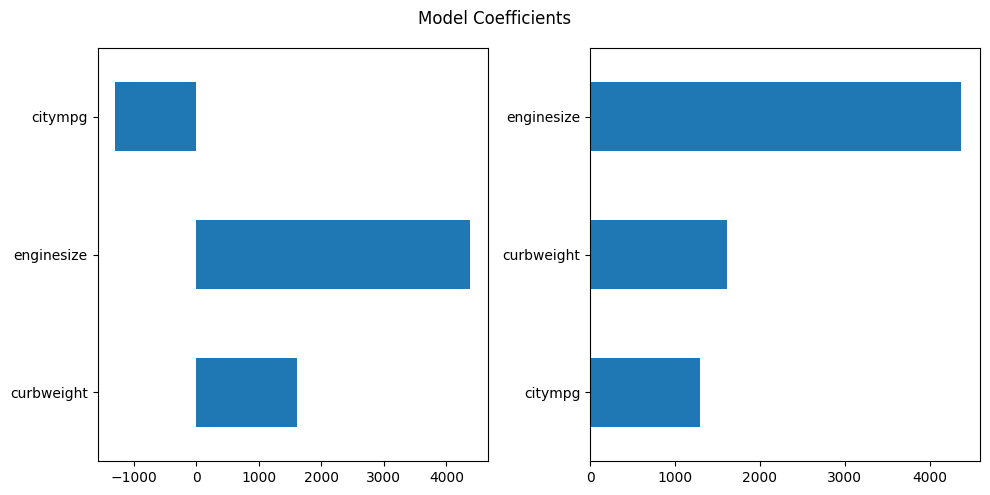

In [83]:
show_coefs(lassoR)

,coefs
curbweight,1893.468241
enginesize,3959.612316
citympg,-1392.678318


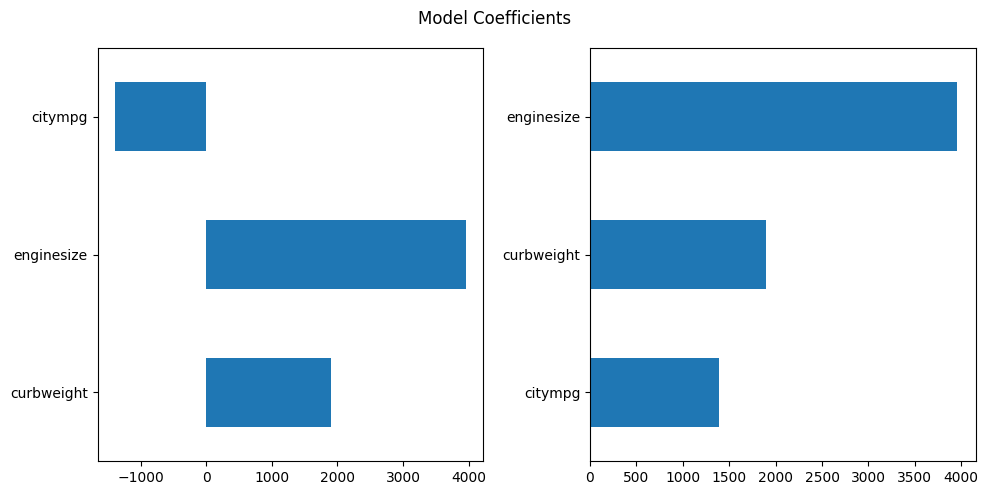

In [80]:
show_coefs(elastic_net)